<a href="https://colab.research.google.com/github/CharleneLimKH/python-mini-projects/blob/main/Linear_Regression_Deep_Learning_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression vs. Deep Learning - Dr. Uri Nahum


In this notebook, we want to compare the performance of linear regression and a deep learning approach to calculate weight from height in a medical record.

In [17]:
# Importieren aller relevanten Packages
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set_theme(style="darkgrid")
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from google.colab import files

# Concentration of drug prediction

In [18]:
# Import weight_height_consentration.csv file to Google Drive
from google.colab import files 
uploaded = files.upload()
#PUT YOUR CODE HERE

Saving Height_Weight_consentration.csv to Height_Weight_consentration (1).csv


In [19]:
import io
df3 = pd.read_csv(io.BytesIO(uploaded['Height_Weight_consentration.csv']))
df.describe()

,Height,Weight,consentration
count,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,11.595485
std,3.847528,32.108439,7.056251
min,54.263133,64.700127,2.266464
25%,63.505620,135.818051,6.549299
50%,66.318070,161.212928,9.419862
75%,69.174262,187.169525,14.796821
max,78.998742,269.989699,77.665656


In [22]:
X=df3[['Height','Weight']] # X contains the variables we want to use for prediction
y=df3.consentration      # y contains the variable we want to use for prediction
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)#PUT YOUR CODE HERE #TEST SIZE 0.3, RANDOM STATE 42

In [23]:
X_train.describe()

,Height,Weight
count,7000.000000,7000.000000
mean,66.320263,161.039283
std,3.845216,32.020745
min,54.263133,64.700127
25%,63.475189,135.881220
50%,66.246015,160.396556
75%,69.128471,186.841241
max,78.998742,269.989699


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


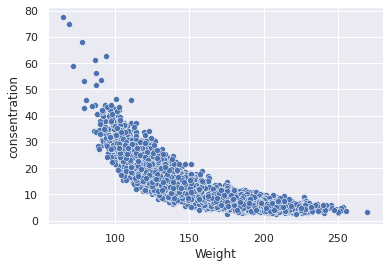

In [24]:
# Let's plot weight versus concentration
sns.scatterplot(X_train.Weight, y = y_train);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


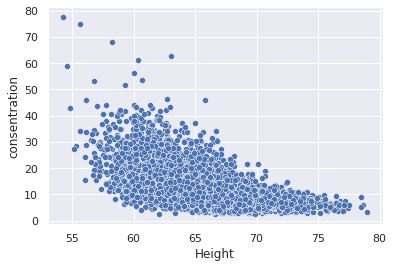

In [25]:
# and height versus concentration
sns.scatterplot(X_train.Height, y = y_train);

In [30]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()           # Create a linear regression model
model.fit(X_train,y_train)      # Find the linear regression parameters using the train data
predictions = model.predict(X_test)  # Predict using the test data




In [38]:
# Let's test how good our prediction is.
mean_squared_error(y_test,predictions)

9.816816989073498

In [43]:
# We calculate the BMI
df3['WtimesH']= (df3.Weight)*(df3.Height)
X=df3[['Weight','Height','WtimesH']]
y=df3.consentration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# We're going to try Linear Regression now
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [45]:
# Let's test how good our prediction is.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

5.792304939532596

In [50]:
# We calculate the BMI
df3['BMI']= 703*(df3.Weight)/(df3.Height**2)
X=df3.BMI
y=df3.consentration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# We're going to try Linear Regression now
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1),y_train)
predictions = model.predict(X_test.values.reshape(-1, 1))

In [52]:
# Let's test how good our prediction is.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

6.3281997144321

In [54]:
# After talking to the pharmacometrician, we build new features
df3['0.6']= 0.6**((df3.BMI))
df3['0.7']= 0.7**((df3.BMI))
df3['0.8']= 0.8**((df3.BMI))
df3['0.9']= 0.9**((df3.BMI))

In [55]:
X=df3[['0.6','0.7','0.8','0.9']]
y=df3.consentration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.describe()

,0.6,0.7,0.8,0.9
count,7.000000e+03,7000.000000,7000.000000,7000.000000
mean,6.025422e-06,0.000185,0.004122,0.071355
std,1.320085e-05,0.000226,0.002787,0.021173
min,4.714936e-08,0.000008,0.000630,0.030822
25%,7.820013e-07,0.000054,0.002150,0.055010
50%,2.013907e-06,0.000105,0.003250,0.066862
75%,6.268138e-06,0.000233,0.005336,0.084505
max,3.741541e-04,0.004048,0.031843,0.196414


In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

0.08458082897174041

In [60]:
# How well will the deep learning architecture do with only "Height" and "Weight"?
X=df3[['Height','Weight']]
y=df3.consentration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)  #use MLPRegressor (the Neural network of sklearn) with random_state=42 and fit it on the data
mean_squared_error(y_test, regr.predict(X_test)) #let us test how good it is

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9112751090984693